<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/GARCH_for_Stock_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an example of GARCH model for stock forecasting.<br>
<br><br>
---

Written by: Arjang Fahim <br>
Date: 4/3/2021 <br>
Last update: 4/3/2021

In [17]:
! pip install arch
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.4 MB 41.6 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


# Read Data

In [19]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# DIS Volatility

In [12]:
start = datetime(2015, 1, 1)
end = datetime(2020, 6, 10)

In [21]:
tickerSymbol = 'DIS'
data = yf.Ticker(tickerSymbol)

In [25]:
prices = data.history(start=start, end=end).Close
returns = 100* prices.pct_change().dropna()

Text(0.5, 1.0, 'DIS Returns')

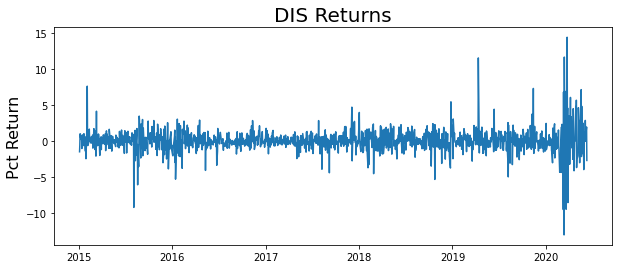

In [26]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('DIS Returns', fontsize=20)

# PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


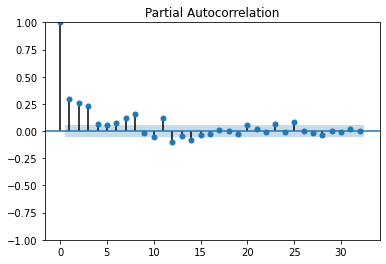

In [27]:
plot_pacf(returns**2)
plt.show()

# Fit GARCH(3,3)

In [28]:
model = arch_model(returns, p=3, q=3)

In [29]:
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 2322.768780482316
Iteration:      2,   Func. Count:     23,   Neg. LLF: 2322.2425667579782
Iteration:      3,   Func. Count:     35,   Neg. LLF: 2318.875957236074
Iteration:      4,   Func. Count:     46,   Neg. LLF: 2312.136699523857
Iteration:      5,   Func. Count:     57,   Neg. LLF: 2308.6432508738885
Iteration:      6,   Func. Count:     68,   Neg. LLF: 2301.336104869648
Iteration:      7,   Func. Count:     79,   Neg. LLF: 2300.4602456434413
Iteration:      8,   Func. Count:     90,   Neg. LLF: 2299.857401358486
Iteration:      9,   Func. Count:    101,   Neg. LLF: 2298.675106960885
Iteration:     10,   Func. Count:    111,   Neg. LLF: 2296.453045945227
Iteration:     11,   Func. Count:    122,   Neg. LLF: 2296.376489699119
Iteration:     12,   Func. Count:    132,   Neg. LLF: 2296.343056865283
Iteration:     13,   Func. Count:    142,   Neg. LLF: 2296.324896303881
Iteration:     14,   Func. Count:    152,   Neg. LLF: 2296.30

In [30]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2296.30
Distribution:                  Normal   AIC:                           4608.61
Method:            Maximum Likelihood   BIC:                           4650.37
                                        No. Observations:                 1367
Date:                Tue, Jun 07 2022   Df Residuals:                     1366
Time:                        16:25:22   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.5567e-03  4.300e-02 -5.946e-02      0.953 [-8.683e-02,8.172e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5478      0.189      2.895  3.789e-03    [  0.177,  0.919]
alpha[1]       0.0681  3.919e-02      1.738  8.226e-02 [-8.711e-03,  0.145]
alpha[2]       0.2036  9.663e-02      2.107  3.509e-02  [1.424e-02,  0.393]
alpha[3]       0.3208      0.151      2.118  3.418e-02  [2.392e-02,  0.618]
beta[1]        0.0000      0.151      0.000      1.000    [ -0.295,  0.295]
beta[2]    9.8799e-15  9.814e-02  1.007e-13      1.000    [ -0.192,  0.192]
beta[3]        0.2242      0.153      1.464      0.143 [-7.597e-02,  0.524]
===========================================================================

Covariance estimator: robust
"""

Clearly the we were not able to capture the volatality of the data (neither of betas are significant). So we try another model below

# Try GARCH(3,0) = ARCH(3)

In [31]:
model = arch_model(returns, p=3, q=0)

In [32]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 2370.746568171819
Iteration:      2,   Func. Count:     17,   Neg. LLF: 2368.5300199995236
Iteration:      3,   Func. Count:     26,   Neg. LLF: 2366.0790934351544
Iteration:      4,   Func. Count:     34,   Neg. LLF: 2346.15961020166
Iteration:      5,   Func. Count:     42,   Neg. LLF: 2330.52764039312
Iteration:      6,   Func. Count:     50,   Neg. LLF: 2327.0661702848593
Iteration:      7,   Func. Count:     58,   Neg. LLF: 2319.3690067769076
Iteration:      8,   Func. Count:     67,   Neg. LLF: 2317.720231711318
Iteration:      9,   Func. Count:     74,   Neg. LLF: 2312.384267533529
Iteration:     10,   Func. Count:     81,   Neg. LLF: 2311.875385384432
Iteration:     11,   Func. Count:     88,   Neg. LLF: 2311.2013306755994
Iteration:     12,   Func. Count:     95,   Neg. LLF: 2311.1896418825413
Iteration:     13,   Func. Count:    102,   Neg. LLF: 2311.1886481657007
Iteration:     14,   Func. Count:    109,   Neg. LLF: 2311.

In [33]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -2311.19
Distribution:                  Normal   AIC:                           4632.38
Method:            Maximum Likelihood   BIC:                           4658.48
                                        No. Observations:                 1367
Date:                Tue, Jun 07 2022   Df Residuals:                     1366
Time:                        16:28:32   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0143  4.002e-02      0.357      0.721 [-6.414e-02,9.271e-02]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.8612      0.138      6.222  4.903e-10    [  0.590,  1.132]
alpha[1]       0.0869  4.455e-02      1.950  5.121e-02 [-4.563e-04,  0.174]
alpha[2]       0.2619  9.096e-02      2.880  3.981e-03  [8.366e-02,  0.440]
alpha[3]       0.3583      0.169      2.125  3.361e-02  [2.778e-02,  0.689]
===========================================================================

Covariance estimator: robust
"""

In [ ]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=3, q=0)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [35]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

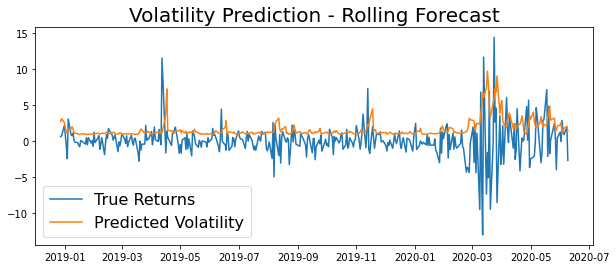

In [37]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# S&P 500

In [38]:
start = datetime(2000, 1, 1)
end = datetime(2020, 6, 10)

In [39]:
tickerSymbol = 'SPY'
data = yf.Ticker(tickerSymbol)

In [40]:
prices = data.history(start=start, end=end).Close
returns = 100* prices.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

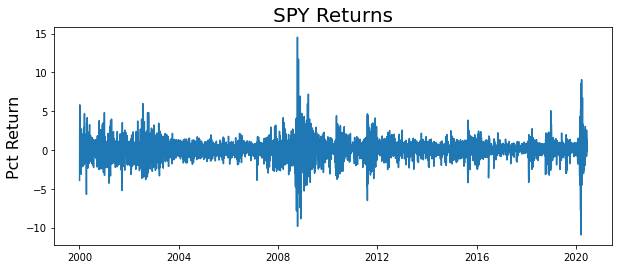

In [41]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

# PACF

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


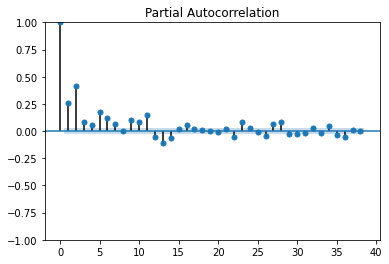

In [42]:
plot_pacf(returns**2)
plt.show()

# Fit GARCH(2,2)

In [43]:
model = arch_model(returns, p=2, q=2)

In [44]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 7044.389446366697
Iteration:      2,   Func. Count:     22,   Neg. LLF: 7035.960749795517
Iteration:      3,   Func. Count:     35,   Neg. LLF: 7035.92200428574
Iteration:      4,   Func. Count:     45,   Neg. LLF: 7035.479935032507
Iteration:      5,   Func. Count:     55,   Neg. LLF: 7034.948221944391
Iteration:      6,   Func. Count:     64,   Neg. LLF: 7034.320609085831
Iteration:      7,   Func. Count:     73,   Neg. LLF: 7034.218568451002
Iteration:      8,   Func. Count:     83,   Neg. LLF: 7034.209765838172
Iteration:      9,   Func. Count:     92,   Neg. LLF: 7034.137803223863
Iteration:     10,   Func. Count:    100,   Neg. LLF: 7034.109909881419
Iteration:     11,   Func. Count:    108,   Neg. LLF: 7034.107575905766
Iteration:     12,   Func. Count:    116,   Neg. LLF: 7034.1073533691415
Iteration:     13,   Func. Count:    124,   Neg. LLF: 7034.107352108526
Optimization terminated successfully.    (Exit mode 0)
         

In [45]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7034.11
Distribution:                  Normal   AIC:                           14080.2
Method:            Maximum Likelihood   BIC:                           14119.5
                                        No. Observations:                 5140
Date:                Tue, Jun 07 2022   Df Residuals:                     5139
Time:                        16:37:21   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0741  1.092e-02      6.787  1.148e-11 [5.271e-02,9.552e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0416  1.005e-02      4.142  3.439e-05 [2.193e-02,6.132e-02]
alpha[1]       0.0853  2.318e-02      3.679  2.338e-04   [3.986e-02,  0.131]
alpha[2]       0.1355  2.868e-02      4.726  2.285e-06   [7.934e-02,  0.192]
beta[1]        0.2550      0.292      0.873      0.382     [ -0.317,  0.827]
beta[2]        0.4943      0.258      1.919  5.496e-02  [-1.050e-02,  0.999]
============================================================================

Covariance estimator: robust
"""

# Rolling Forecast

In [ ]:
rolling_predictions = []
test_size = 365*5

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [47]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365*5:])

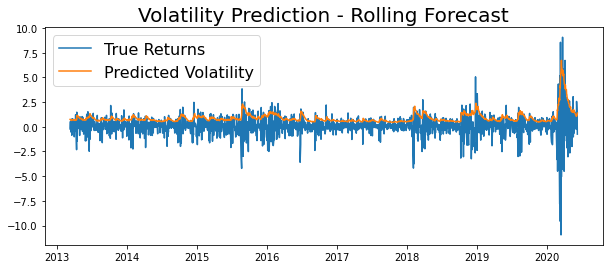

In [48]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365*5:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

# How to use the model

In [50]:
train = returns
model = arch_model(train, p=2, q=2)
model_fit = model.fit(disp='off')

In [51]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

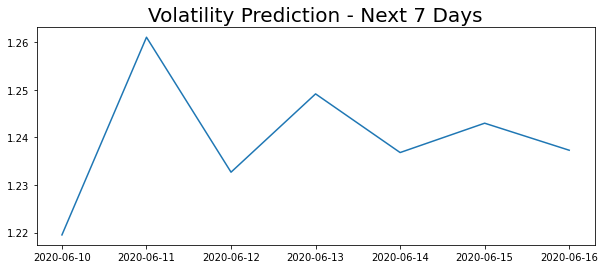

In [52]:
plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)